In [147]:
import pandas as pd
import numpy as np
import scipy as sc

In [17]:
# reading in TCGA ovarian cancer clinical data
df_clinical = pd.read_csv("/Users/maayanlab/Downloads/clinical.cart.2018-06-28/clinical.csv").set_index('submitter_id')

In [18]:
df_clinical.head()

,case_id,project_id,gender,year_of_birth,race,ethnicity,year_of_death,classification_of_tumor,last_known_disease_status,primary_diagnosis,...,tumor_grade,tissue_or_organ_of_origin,days_to_birth,progression_or_recurrence,prior_malignancy,site_of_resection_or_biopsy,days_to_last_follow_up,therapeutic_agents,treatment_intent_type,treatment_or_therapy
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-29-2434,cb090048-9af1-489d-9ebe-7efaa3dc4e85,TCGA-OV,female,1957,white,hispanic or latino,--,not reported,not reported,C56.9,...,not reported,C56.9,-18997,not reported,not reported,C56.9,349,--,--,--
TCGA-61-1738,72c40fba-f502-489b-ad87-843f52655894,TCGA-OV,female,1945,black or african american,not reported,2007,not reported,not reported,C56.9,...,not reported,C56.9,-21965,not reported,not reported,C56.9,1089,--,--,--
TCGA-61-1917,87cdf9a8-0579-4d3e-b4df-0f8eef63d7f4,TCGA-OV,female,1942,white,not hispanic or latino,2005,not reported,not reported,C56.9,...,not reported,C56.9,-21972,not reported,not reported,C56.9,1321,--,--,--
TCGA-13-2059,f4b56568-a74a-4a2e-89d9-11722ecf5948,TCGA-OV,female,1959,white,not hispanic or latino,--,not reported,not reported,C56.9,...,not reported,C56.9,-18449,not reported,not reported,C56.9,2387,--,--,--
TCGA-13-0916,5f60bc2d-738f-43fc-a3fb-61ec6e80e3d4,TCGA-OV,female,1957,white,not hispanic or latino,--,not reported,not reported,C56.9,...,not reported,C56.9,-18189,not reported,not reported,C56.9,1785,--,--,--


In [121]:
# reading in TCGA ovarian cancer expression file, normalized version

df_expression = pd.read_table("/Users/maayanlab/Documents/Ovarian Cancer Project/TCGA-OV-fpkm-uq.txt").set_index('gene_symbol')


# making list of patient (submitter) ids to use for the clinical analysis

sub_ids_exp = list(df_expression.columns.values)

In [122]:
## extracting rows from the clinical df for patients that are also in the expression df

# df_clinical_matches = df_clinical.index.str.match(list_submitter_ids_expression)

# for row in df_clinical.rows:
    
#     if row.index = 

# df_clinical_matches = df_clinical.loc[df.index.isin(list_submitter_ids_expression)]



sub_ids_clinical = list(df_clinical.index.values)
expressionLength = len(sub_ids_exp)
clinicalLength = len(sub_ids_clinical)
sub_ids_matches = []

x = 0 # variable to run through submitter ids clinical
y = 0 # variable to run through submitter ids expression

sub_ids_clinical_sorted=[]
sub_ids_exp_sorted=[]
sub_ids_clinical_sorted = df_clinical.index.sort_values(ascending=True)
sub_ids_exp_sorted = df_expression.columns.sort_values(ascending=True)


# while x < clinicalLength:
#     while y < expressionLength:
#         expression_id = submitter_id_expression_sorted[y]
#         if submitter_id_clinical_sorted[x] == (expression_id[0:12]):
#             list_submitter_ids_matches.append(submitter_id_clinical_sorted[x])
#         y = y + 1        
#     x = x + 1


  
# finding common submitter ids between clinical and expression data

expression_sliced = []
while y < expressionLength:
    exp_id = sub_ids_exp[y]
    expression_sliced.append(exp_id[0:12])
    y = y + 1
    

common_sub_ids = list(set(expression_sliced).intersection(set(sub_ids_clinical)))







In [172]:
# remaking dataframe from other jupyter notebook of top 500 and bottom 500 genes for each patient


import scipy.stats as ss


df_zscore2 = df.T.apply(ss.zscore, axis=0).T.dropna().apply(ss.zscore, axis=0)


# define empty dictionary
results = {}


# Loop through samples
for sample in df_zscore2.columns[:]:
    
    # Extract column
    col = df_zscore2[sample].sort_values(ascending=False) # sort values in decreasing order
    
    genesets={
        "top":col.index[:500].tolist(),
        "bottom":col.index[-500:].tolist()


    }
    # Extract the top 500 genes from the index
    results[sample] = genesets

/Users/maayanlab/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [176]:
# making dataframe of top and bottom 500 genes for each patient and editing the df so that it can be merged with the clinical df

df_genes = pd.DataFrame(results)
df_genes = df_genes.T # transform
df_genes['submitter_id'] = expression_sliced # adding new column of what will be the index
df_genes.set_index('submitter_id', inplace=True) # replacing index with version that does not have extra numbers at end


In [178]:
# combining the clinical and expression dataframes for common submitter ids

df_combined = pd.DataFrame()
df_combined = pd.merge(df_clinical, df_genes, how='inner', on=["submitter_id"])


In [179]:
df_combined.head()

,case_id,project_id,gender,year_of_birth,race,ethnicity,year_of_death,classification_of_tumor,last_known_disease_status,primary_diagnosis,...,days_to_birth,progression_or_recurrence,prior_malignancy,site_of_resection_or_biopsy,days_to_last_follow_up,therapeutic_agents,treatment_intent_type,treatment_or_therapy,bottom,top
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-61-1738,72c40fba-f502-489b-ad87-843f52655894,TCGA-OV,female,1945,black or african american,not reported,2007,not reported,not reported,C56.9,...,-21965,not reported,not reported,C56.9,1089,--,--,--,"[KIF7, TASP1, SPDYE1, KDM2B, SOWAHC, PABPC1P4,...","[RNA5SP63, SLC10A1, SLC16A14P1, UNGP1, MKX-AS1..."
TCGA-13-0916,5f60bc2d-738f-43fc-a3fb-61ec6e80e3d4,TCGA-OV,female,1957,white,not hispanic or latino,--,not reported,not reported,C56.9,...,-18189,not reported,not reported,C56.9,1785,--,--,--,"[HNRNPH1, UBL3, DIS3, SKI, BRMS1L, DNAJC3, SNR...","[PNLIPRP3, GPN3P1, LINC00836, GPR50-AS1, RPL21..."
TCGA-61-1914,8e1b8811-1eb2-4337-852c-c19eaa0ee418,TCGA-OV,female,1938,not reported,not reported,--,not reported,not reported,C56.9,...,-23850,not reported,not reported,C56.9,1722,--,--,--,"[EP400, FAM193A, SECISBP2L, TMPPE, EIF4A1, WHS...","[RNU6-1037P, FAM159B, PRR21, HIST1H2APS6, IGLV..."
TCGA-09-1659,644a88a7-dc56-468a-af5c-60278aab7642,TCGA-OV,female,1946,white,not hispanic or latino,1997,not reported,not reported,C56.9,...,-18733,not reported,not reported,C56.9,--,--,--,--,"[SP1, CEP131, XPNPEP3, PHF2, CTDSPL, TCAIM, RN...","[CTAG2, RPL36P2, PNPLA4P1, RNU6-832P, OR5M4P, ..."
TCGA-13-1404,8e107f4b-1912-4d3e-814a-b863e2d65ed7,TCGA-OV,female,1960,white,not hispanic or latino,--,not reported,not reported,C56.9,...,-17784,not reported,not reported,C56.9,2469,--,--,--,"[ARHGEF34P, NAPA, SRSF9P1, TPCN1, KLHL21, GCC2...","[RNA5SP458, RNU6-815P, MIR1238, RNU6-278P, RNU..."


In [180]:
df_combined.to_excel("/Users/maayanlab/Documents/Ovarian Cancer Project/clinicalandgenescombined.xlsx")

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
df_combined = df_combined.replace('--', None)
df_combined['age_at_diagnosis'] = df_combined['age_at_diagnosis'].astype(int)
df_combined['days_to_death'] = df_combined['days_to_death'].astype(int)

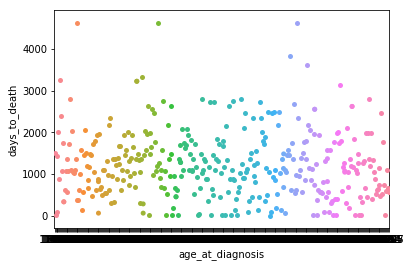

In [230]:
# exploratory plot--age at diagnosis and days until death

# making plot
sns.stripplot(x="age_at_diagnosis", y="days_to_death", data=df_combined)

plt.show()

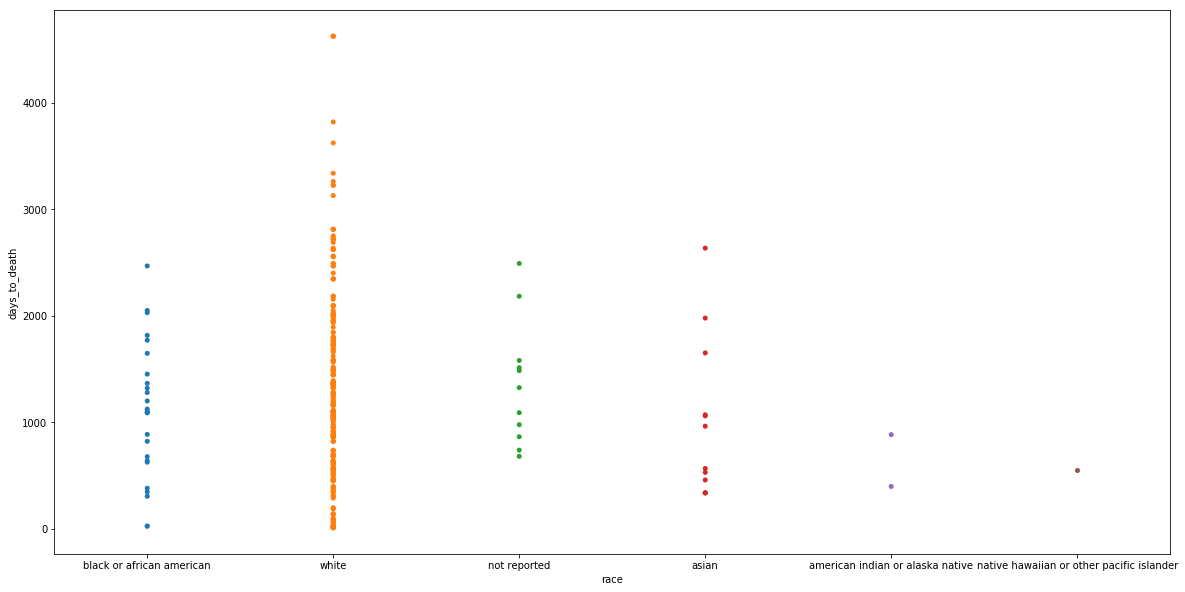

In [235]:
# exploratory plot--race and survival
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(x="race", y="days_to_death", data=df_combined)
plt.show()

In [390]:
## making heatmap from TCGA expression data--before zscores

# first, calculating variance across rows for each gene--only using top 500-2000 genes in the heatmap

expression_variance = []
expression_variance.append(df_expression.var(axis=1))

df_expression_variance = pd.DataFrame(expression_variance)

In [398]:
df_expression_variance = df_expression_variance.T

In [364]:
df_expression_variance = df_expression_variance.drop("gene_symbol", axis=1)

In [ ]:
df_expression_variance = df_expression_variance.columns

In [404]:
df_expression_variance.head()

,variance
gene_symbol,
A1BG,3.133371e+06
A1BG-AS1,1.117022e+08
A1CF,1.434501e+06
A2M,8.265989e+11
A2M-AS1,9.804144e+08


In [384]:
df_expression['variance'] = df_expression.var(axis=0)

In [401]:
df_expression_variance.columns=["variance"]

In [405]:
expression_variance_sorted = []
expression_variance_sorted.append(df_expression_variance["variance"].sort_values(ascending=False))
df_expression_variance_sorted = pd.DataFrame(expression_variance_sorted)

In [407]:
df_expression_variance_sorted = df_expression_variance_sorted.T

In [410]:
df_expression_variance_sorted_top1000 = df_expression_variance_sorted[:1000] # df of the top 1000 genes with the most variance and their calculated variance

In [412]:
# making df of the expression for all patients of the top 1000 genes with the most variance
df_expression_top1000 = pd.merge(df_expression_variance_sorted_top1000, df_expression, how='inner', on=["gene_symbol"])

In [416]:
df_expression_top1000 = df_expression_top1000.drop("variance_x", axis=1)
df_expression_top1000 = df_expression_top1000.drop("variance_y", axis=1)

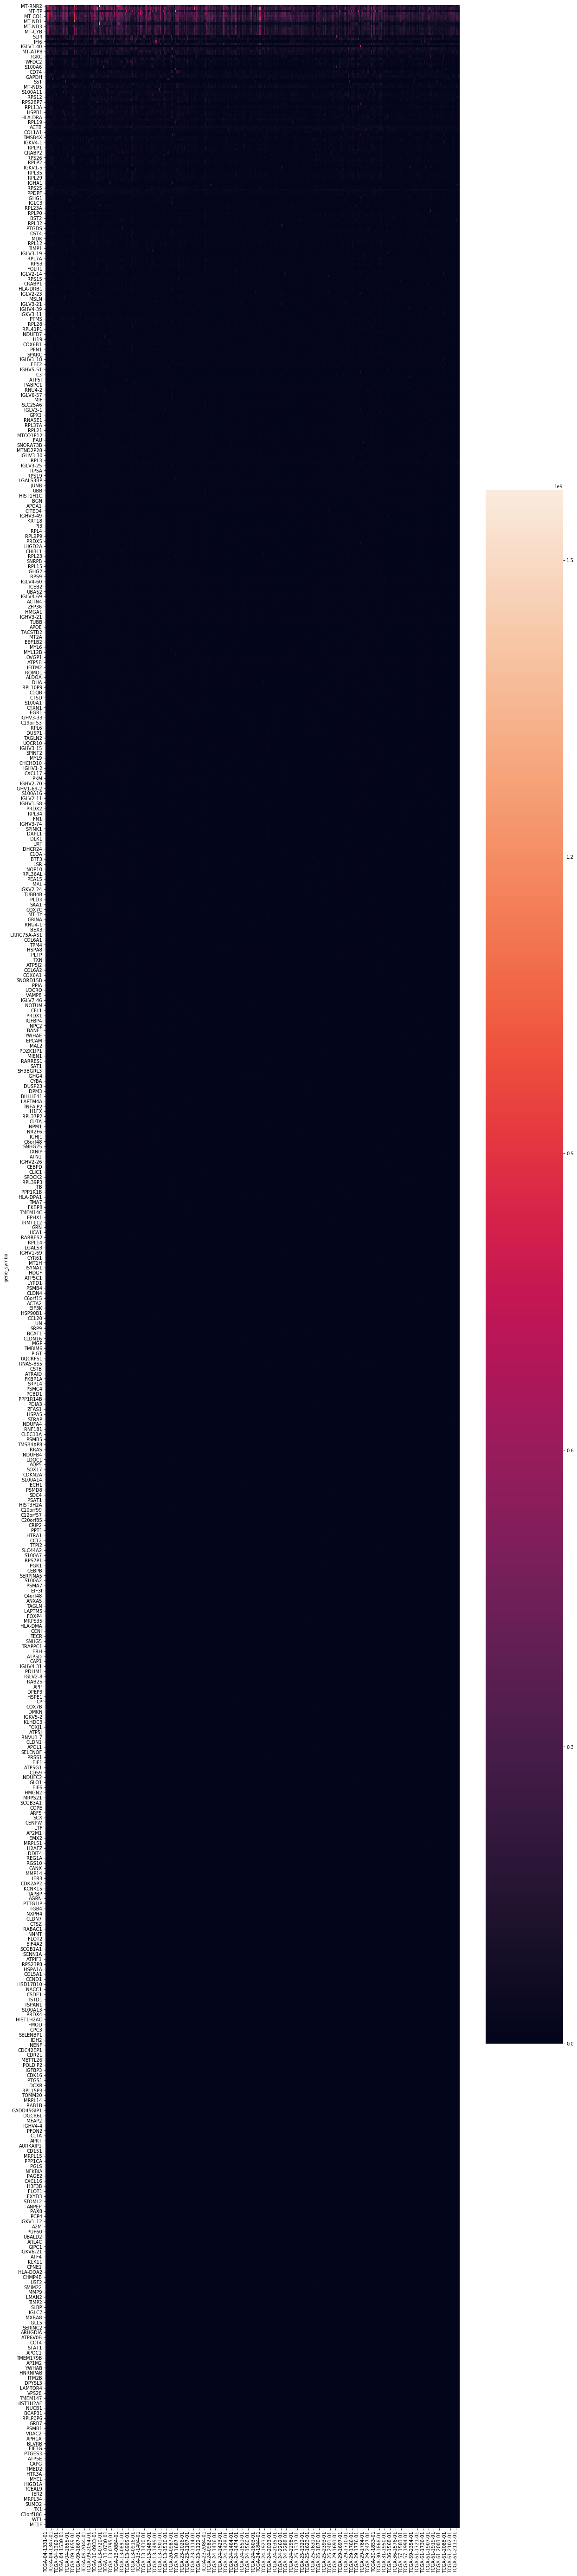

In [420]:
# making heatmap of the expression of the 1000 most variant genes

fig, ax = plt.subplots(figsize=(20,100))
sns.heatmap(df_expression_top1000)


plt.show()
